## Make Figures

This notebook reads in the `.hdf` files created in `run_sims.ipynb`, and creates the figure 2 (time series plots) and figure 3 (power spectrum parameter space heatmap plots)

Just for fun, we also make a few additional figures here that are not shown in the chapter text. 

## Setup

Importage

In [29]:
# Generic stuff

import warnings; warnings.filterwarnings('ignore')
import os, numpy as np,pandas as pd


# Vizualization stuff

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import seaborn as sns
from IPython.display import Image

Define some variables

In [30]:
# Folder locations
base_dir = os.getcwd()+'/../'
code_dir = base_dir + '/code'
data_dir = base_dir + '/data'
figs_dir = base_dir + '/figs'

fig2_file = figs_dir + '/figure_2.png'
fig3_file = figs_dir + '/figure_3.png'

## Figure 2 - Exemplary Parameter sets

In [31]:
sim_rest_nostim_ts = pd.read_hdf(data_dir + '/sim_singlepsets_rest.hdf', 'sim_rest_nostim_ts')
sim_task_nostim_ts = pd.read_hdf(data_dir + '/sim_singlepsets_task.hdf', 'sim_task_nostim_ts')

sim_rest_stim27Hz_ts = pd.read_hdf(data_dir + '/sim_singlepsets_rest.hdf', 'sim_rest_stim27Hz_ts')
sim_task_stim27Hz_ts = pd.read_hdf(data_dir + '/sim_singlepsets_task.hdf', 'sim_task_stim27Hz_ts')

sim_rest_nostim_psd = pd.read_hdf(data_dir + '/sim_singlepsets_rest.hdf', 'sim_rest_nostim_psd')
sim_task_nostim_psd = pd.read_hdf(data_dir + '/sim_singlepsets_task.hdf', 'sim_task_nostim_psd')

sim_rest_stim27Hz_psd = pd.read_hdf(data_dir + '/sim_singlepsets_rest.hdf', 'sim_rest_stim27Hz_psd')
sim_task_stim27Hz_psd = pd.read_hdf(data_dir + '/sim_singlepsets_task.hdf', 'sim_task_stim27Hz_psd')

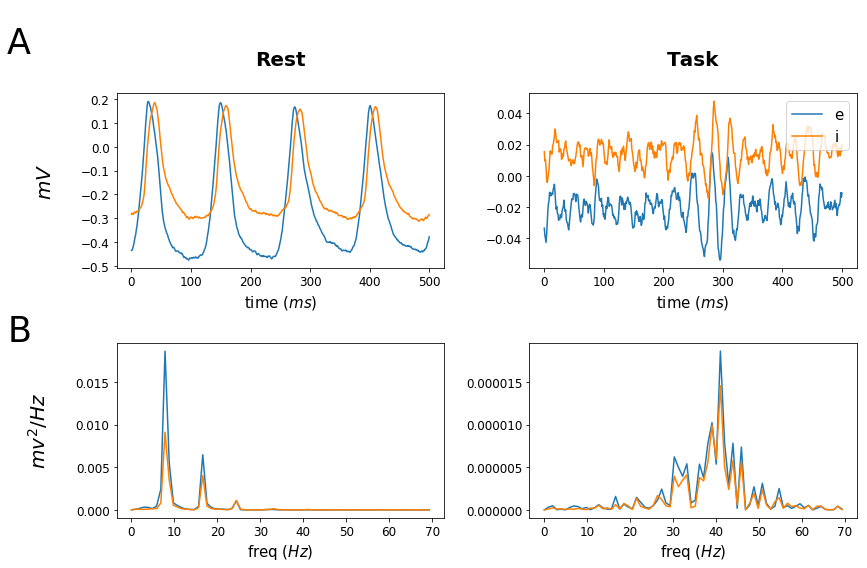

In [32]:

fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(12,8))

midnode = 50

sim_rest_nostim_ts['e'][midnode].loc[:500].plot(ax=ax[0,0],c='#1f78b4')
sim_rest_nostim_ts['i'][midnode].loc[:500].plot(ax=ax[0,0],c='#ff7f00')

sim_task_nostim_ts['e'][midnode].loc[:500].plot(ax=ax[0,1],c='#1f78b4')
sim_task_nostim_ts['i'][midnode].loc[:500].plot(ax=ax[0,1],c='#ff7f00')


sim_rest_nostim_psd['e'][midnode].loc[:70].plot(ax=ax[1,0],c='#1f78b4')
sim_rest_nostim_psd['i'][midnode].loc[:70].plot(ax=ax[1,0],c='#ff7f00')

sim_task_nostim_psd['e'][midnode].loc[:70].plot(ax=ax[1,1],c='#1f78b4')
sim_task_nostim_psd['i'][midnode].loc[:70].plot(ax=ax[1,1],c='#ff7f00')




ax[0][0].set_xlabel('time $(ms)$\n',fontsize=15)
ax[0][0].set_ylabel('$mV$\n',fontsize=20)

ax[0][1].set_xlabel('time $(ms)$\n',fontsize=15)

ax[1][0].set_xlabel('freq $(Hz)$',fontsize=15)
ax[1][0].set_ylabel('$mv^2/Hz$\n',fontsize=20)

ax[1][1].set_xlabel('freq $(Hz)$',fontsize=15)

ax[0][0].set_title('\n\nRest\n',fontweight='bold', fontsize=20)
ax[0][1].set_title('\n\nTask\n',fontweight='bold', fontsize=20)

for a in ax.ravel():
    for t in a.get_xticklabels(): t.set_fontsize(12)
    for t in a.get_yticklabels(): t.set_fontsize(12)
        

a = ax[0][1]
lines = a.get_lines()
labs = ('e', 'i')
a.legend(lines,labs,loc=1,fontsize=15)        
        
    
fig.text(0,0.9,'A',fontsize=35)# fontweight='bold', fontsize=25)
fig.text(0,0.4,'B',fontsize=35)# fontweight='bold', fontsize=25)


plt.tight_layout()

plt.savefig(fig2_file, bbox_inches='tight', transparent=True,dpi=600)


Additional figure not shown in chapter: here are the same plots when applying 27Hz stimulation...

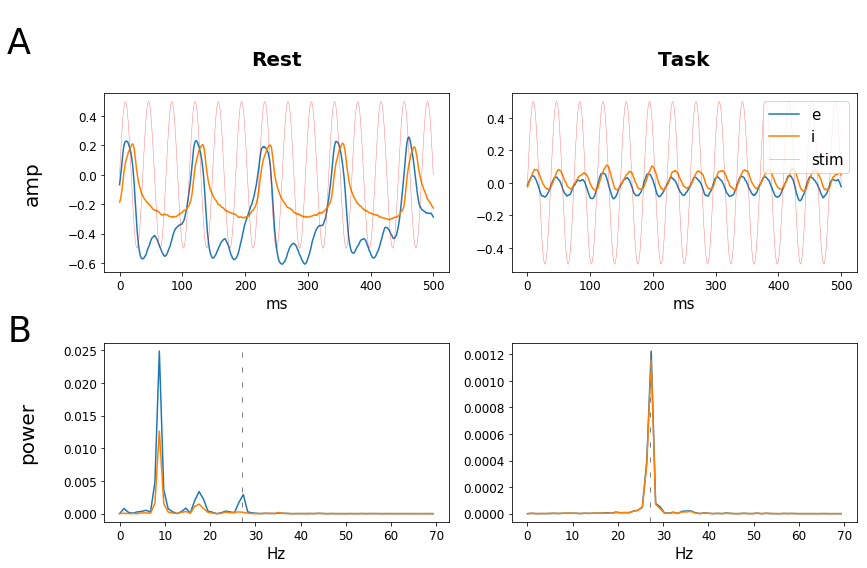

In [33]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(12,8))

sim_rest_stim27Hz_ts['e'][midnode].loc[:500].plot(ax=ax[0,0],c='#1f78b4')
sim_rest_stim27Hz_ts['i'][midnode].loc[:500].plot(ax=ax[0,0],c='#ff7f00')
sim_rest_stim27Hz_ts['stim'].loc[:500].plot(ax=ax[0][0],legend=False,c='r',linewidth=0.5,alpha=0.5)#,cmap='jet')

sim_task_stim27Hz_ts['e'][midnode].loc[:500].plot(ax=ax[0,1],c='#1f78b4')
sim_task_stim27Hz_ts['i'][midnode].loc[:500].plot(ax=ax[0,1],c='#ff7f00')
sim_task_stim27Hz_ts['stim'].loc[:500].plot(ax=ax[0][1],legend=False,c='r',linewidth=0.5,alpha=0.5)#,cmap='jet')


sim_rest_stim27Hz_psd['e'][midnode].loc[:70].plot(ax=ax[1,0],c='#1f78b4')
sim_rest_stim27Hz_psd['i'][midnode].loc[:70].plot(ax=ax[1,0],c='#ff7f00')

sim_task_stim27Hz_psd['e'][midnode].loc[:70].plot(ax=ax[1,1],c='#1f78b4')
sim_task_stim27Hz_psd['i'][midnode].loc[:70].plot(ax=ax[1,1],c='#ff7f00')


ax[1][1].axvline(x=27,c='gray',linestyle=(0, (5, 10)),linewidth=1)#,alpha=0.5)
ax[1][0].axvline(x=27,c='gray',linestyle=(0, (5, 10)),linewidth=1)#,alpha=0.5)


ax[0][0].set_xlabel('ms\n',fontsize=15)
ax[0][0].set_ylabel('amp\n',fontsize=20)

ax[0][1].set_xlabel('ms\n',fontsize=15)

ax[1][0].set_xlabel('Hz',fontsize=15)
ax[1][0].set_ylabel('power\n',fontsize=20)

ax[1][1].set_xlabel('Hz',fontsize=15)

ax[0][0].set_title('\n\nRest\n',fontweight='bold', fontsize=20)
ax[0][1].set_title('\n\nTask\n',fontweight='bold', fontsize=20)


for a in ax.ravel():
    for t in a.get_xticklabels(): t.set_fontsize(12)
    for t in a.get_yticklabels(): t.set_fontsize(12)
        

a = ax[0][1]
lines = a.get_lines()
labs = ('e', 'i', 'stim')
a.legend(lines,labs,loc=1,fontsize=15)        
        
    
fig.text(0,0.9,'A',fontsize=35)# fontweight='bold', fontsize=25)
fig.text(0,0.4,'B',fontsize=35)# fontweight='bold', fontsize=25)


   

plt.tight_layout()



## Figure 3 - Stim amplitude vs. Stim frequency parameter space plots

In [42]:
sim_rest_psweep_maxfreqs = pd.read_hdf(data_dir + '/sim_psweeps_rest.hdf', 'sim_rest_psweep_maxfreqs')
sim_rest_psweep_maxamps = pd.read_hdf(data_dir + '/sim_psweeps_rest.hdf', 'sim_rest_psweep_maxamps')

sim_task_psweep_maxfreqs = pd.read_hdf(data_dir + '/sim_psweeps_task.hdf', 'sim_task_psweep_maxfreqs')
sim_task_psweep_maxamps = pd.read_hdf(data_dir + '/sim_psweeps_task.hdf', 'sim_task_psweep_maxamps')

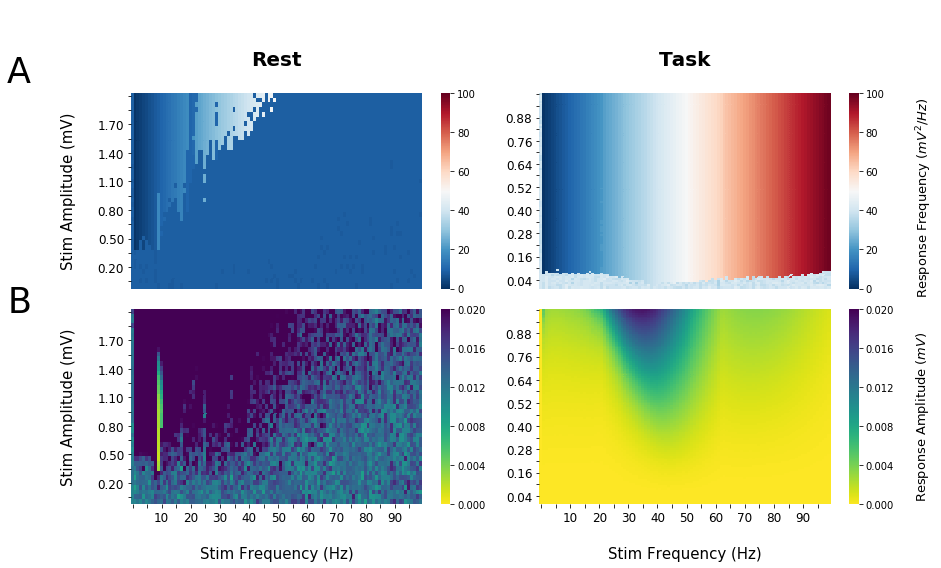

In [49]:

df1 = sim_rest_psweep_maxfreqs.iloc[::-1].copy()
df2 = sim_task_psweep_maxfreqs.iloc[::-1].copy() 
df3 = sim_rest_psweep_maxamps.iloc[::-1].copy()
df4 = sim_task_psweep_maxamps.iloc[::-1].copy()

df1.index = ['%1.2f' %i for i in df1.index]
df1.columns = ['%1.0f' %i for i in df1.columns]
df2.index = ['%1.2f' %i for i in df2.index]
df2.columns = ['%1.0f' %i for i in df2.columns]
df3.index = ['%1.2f' %i for i in df3.index]
df3.columns = ['%1.0f' %i for i in df3.columns]
df4.index = ['%1.2f' %i for i in df4.index]
df4.columns = ['%1.0f' %i for i in df4.columns]

    
    
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(12,8))

sns.heatmap(df1,ax=ax[0][0],cmap='RdBu_r',vmin=0.,vmax=100.)#,vmax=100.)
sns.heatmap(df2,ax=ax[0][1],cmap='RdBu_r',vmin=0.,vmax=100.)#,vmax=100.)
sns.heatmap(df3,ax=ax[1][0],cmap='viridis_r',vmin=0.,vmax=0.02)#$,vmax=0.1)
sns.heatmap(df4,ax=ax[1][1],cmap='viridis_r',vmin=0.,vmax=0.02)#,vmax=0.02)#,vmax=0.1)




ax[0][0].set_ylabel('Stim Amplitude (mV)\n',fontsize=15)
ax[1][0].set_ylabel('Stim Amplitude (mV)\n',fontsize=15)

ax[1][0].set_xlabel('\nStim Frequency (Hz)',fontsize=15)
ax[1][1].set_xlabel('\nStim Frequency (Hz)',fontsize=15)


#for a in ax.ravel():
#    a.set_ylim([0,2.0])
    

ax[0][0].set_title('\n\nRest\n',fontweight='bold', fontsize=20)
ax[0][1].set_title('\n\nTask\n',fontweight='bold', fontsize=20)



for a in ax.ravel():
    for t in a.get_xticklabels(): t.set_fontsize(12)
    for t in a.get_yticklabels(): t.set_fontsize(12)






newticklabs = []
for t_it,t in enumerate(ax[0][0].get_xticklabels()):
    if (np.mod(t_it,2) == 0) and (t_it!=0):
        newticklabs.append(t)
    else: 
        newticklabs.append('')
ax[1][0].set_xticklabels(newticklabs)
ax[1][1].set_xticklabels(newticklabs)



newticklabs = []
for t_it,t in enumerate(ax[0][0].get_yticklabels()):
    if (np.mod(t_it,2) == 0) and (t_it!=0):
        newticklabs.append(t)
    else: 
        newticklabs.append('')
ax[0][0].set_yticklabels(newticklabs)
ax[1][0].set_yticklabels(newticklabs)









newticklabs = []
for t_it,t in enumerate(ax[1][1].get_xticklabels()):
    if (np.mod(t_it,2) == 0) and (t_it!=0):
        newticklabs.append(t)
    else: 
        newticklabs.append('')
ax[0][1].set_xticklabels(newticklabs)
ax[1][1].set_xticklabels(newticklabs)



newticklabs = []
for t_it,t in enumerate(ax[1][1].get_yticklabels()):
    if (np.mod(t_it,2) == 0) and (t_it!=0):
        newticklabs.append(t)
    else: 
        newticklabs.append('')
ax[0][1].set_yticklabels(newticklabs)
ax[1][1].set_yticklabels(newticklabs)




for a in ax.ravel(): 
    a.set_xticklabels(a.get_xticklabels(),fontdict={'rotation': 0})


ax[0][0].set_xticks([])
ax[0][1].set_xticks([])


fig.text(-0.05,0.85,'A',fontsize=35)
fig.text(-0.05,0.45,'B',fontsize=35)


fig.text(1,0.8,'Response Frequency $(mV^2/Hz) $',fontsize=13,fontdict={'rotation': 90})
fig.text(1,0.4,'Response Amplitude $(mV) $ ',fontsize=13,fontdict={'rotation': 90})

    
plt.tight_layout()


plt.savefig(fig3_file, bbox_inches='tight', transparent=True, dpi=600)